## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

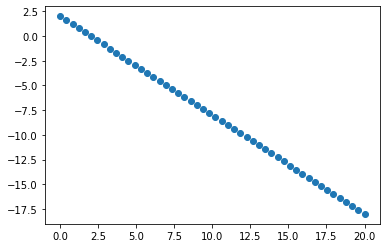

In [4]:
plt.scatter(X,y)

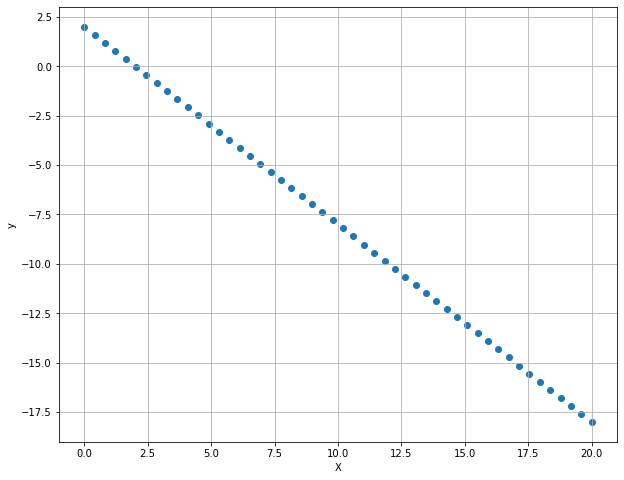

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def gd(x_, y_, lrr, max_itr):
    
    x = x_
    y = y_
    theta_0, theta_1 = 0,0
    lr = lrr
    max_iter = max_itr
    grad_tol = 0.001
    loss = np.array([])
    thetas_0 = np.array([])
    thetas_1 = np.array([])
    h_s = []
    for i in range(max_iter):
        h_x = theta_0 + theta_1 * x
#         print(h_x.shape)
    #     Step 3
        e = h_x-y
        j = (1/(2*len(e))*e@e)
        
    #     Step 4
        d_theta_0 = (1/len(e)) * e@np.ones(e.shape)
        d_theta_1 = (1/len(e)) * np.sum(e@x)
        loss = np.append(loss, j)
        thetas_0 = np.append(thetas_0, theta_0)
        thetas_1 = np.append(thetas_1, theta_1)
        h_s.append(h_x)
#         h_s = np.vstack((h_s, h_x))
        grad = np.array([d_theta_0, d_theta_1])
        
        theta_0, theta_1 = theta_0 - lr*d_theta_0, theta_1 - lr*d_theta_1
        
#         Check stop condition
        if (i != 0) and (abs(loss[i-1]-loss[i]) < 0.001):
            print("Loss Didn't improve, stop condition satisfied in epoch ", i)
            return thetas_0, thetas_1, loss, h_s
            break
    #     Check convergence condition
        if np.linalg.norm(grad) < grad_tol:
            print('Converged at iteration ', i)
            print ('****************** Training Report ********************')
            print()
            print('Gradient Descent converged after {} iterations'.format(i))
            print()
            print('theta_0_Opt:', theta_0)
            print('theta_1_Opt:', theta_1)
            print()
            print('Error Vector:')
            print(e)
            print()
            print('Cost (j):', j)
            print()
            print('h(x) = y_predict:')
            print(h_x)
            print()
            print('y_actual:')
            print(y)
            return thetas_0, thetas_1, loss, h_s
#             and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
            break
    print("didn't reach convergence tolerance until last iteration")
#     print(h_s.shape)
    return thetas_0, thetas_1, loss, h_s

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
th_0, th_1, loss, h = gd(X, y, 0.0005, 300)
np.array(h).shape

Loss Didn't improve, stop condition satisfied in epoch  65


(66, 50)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [7]:
h = np.array(h)
from sklearn.metrics import r2_score
print('r2_score:', r2_score(y,h[-1].T))

r2_score: 0.9686158031920962


r2_score: 0.9686158031920962


cost: 0.5444197405452698


Text(0, 0.5, 'Loss')

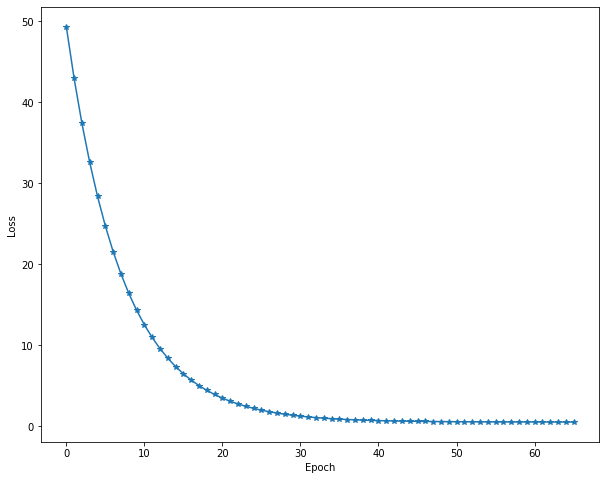

In [8]:
print("cost:", loss[-1])
plt.figure(figsize=(10,8))
plt.plot(loss[:70], marker='*')
plt.xlabel('Epoch')
plt.ylabel('Loss')

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

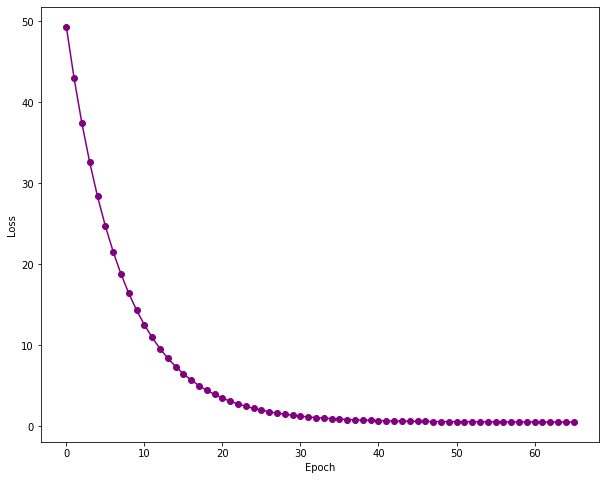

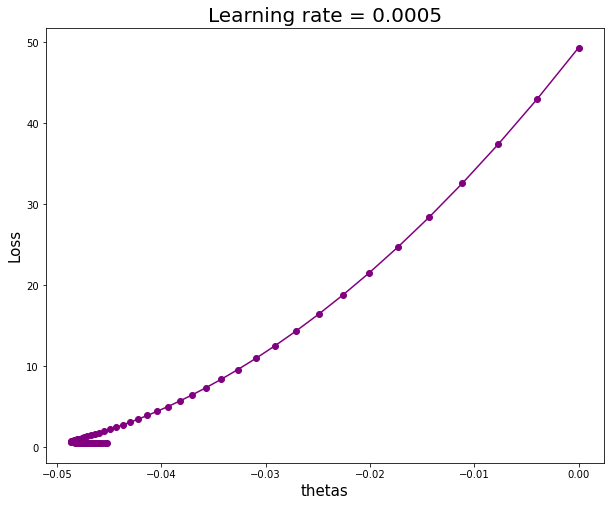

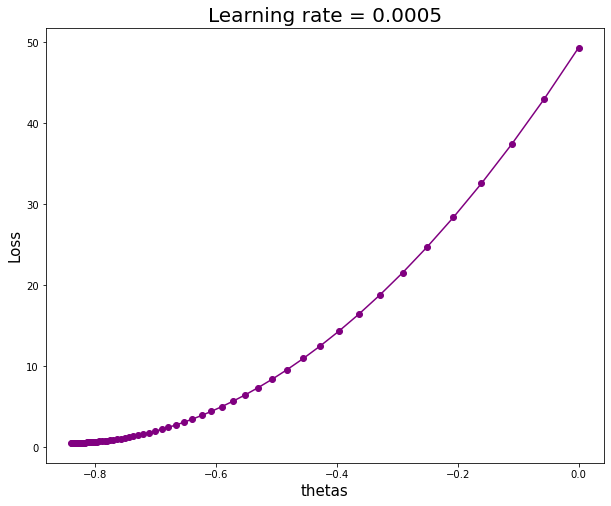

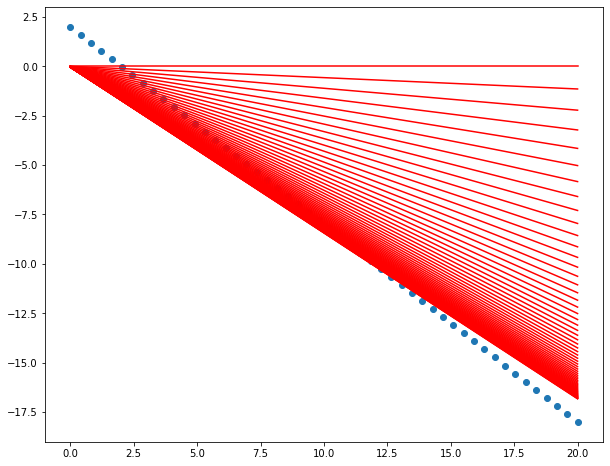

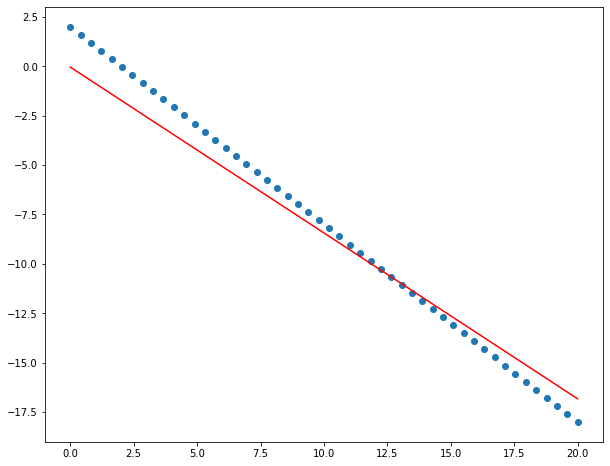

In [11]:
def loss_eps(loss, margin=100):
    plt.figure(figsize=(10,8))
    plt.plot(loss[:margin], marker='o', c='purple')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
loss_eps(loss, len(loss))

def theta_loss(thetas, loss, lr, margin=100):
    plt.figure(figsize=(10,8))
    plt.plot(thetas[:margin], loss[:margin], marker='o', c='purple')
    plt.xlabel('thetas', fontsize = 15)
    plt.ylabel('Loss', fontsize = 15)
    plt.title('Learning rate = {}'.format(lr), fontsize = 20)
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))

def all_reg_lines(X, y, hs):    
    plt.figure(figsize=(10,8))
    plt.scatter(X,y)
    for h in hs:
        plt.plot(X,h.T, c='r')
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

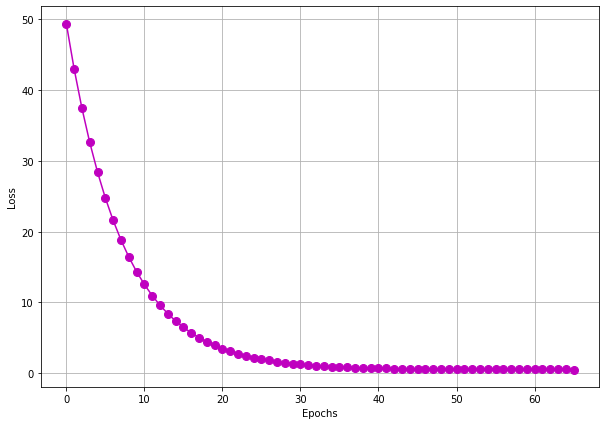

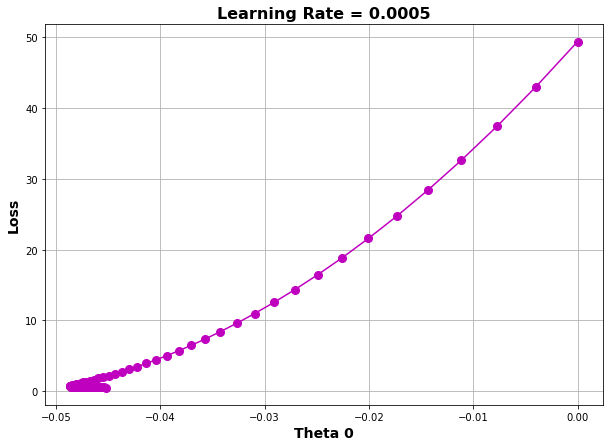

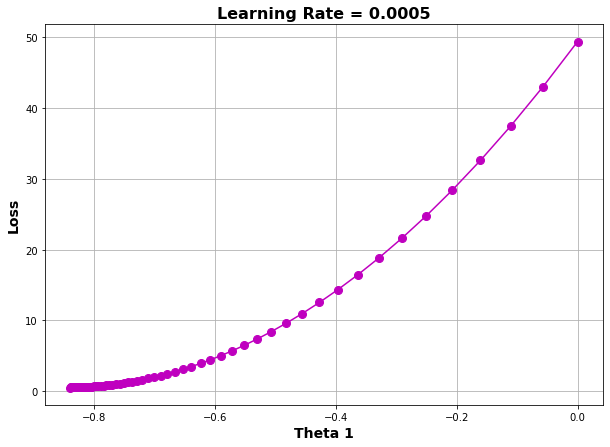

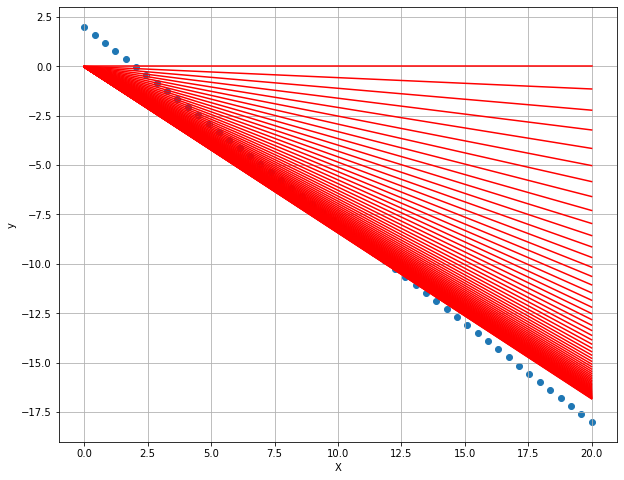

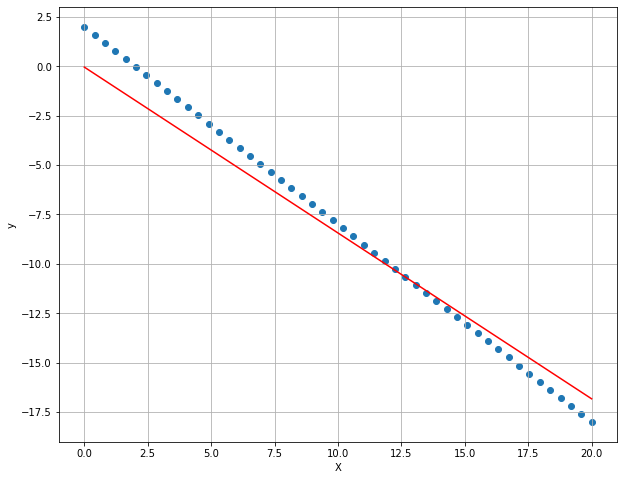

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [19]:
def momentum_gd(x, y, lr, momentum,max_iter):
    
    # Definitions
    theta_0, theta_1, v_0, v_1= 0,0,0,0
    grad_tol = 0.001
    loss = np.array([])
    thetas_0 = np.array([])
    thetas_1 = np.array([])
    vs_0 = np.array([])
    vs_1 = np.array([])
    h_s = []
    
    #Epochs loop
    for i in range(max_iter):
        
        h_x = theta_0 + theta_1 * x
        
        #Step 3
        e = h_x-y
        j = (1/(2*len(e))*e@e)
        
        #Step 4
        d_theta_0 = (1/len(e)) * e@np.ones(e.shape)
        d_theta_1 = (1/len(e)) * np.sum(e@x)
        
        #Appends (Before update)
        loss = np.append(loss, j)
        thetas_0 = np.append(thetas_0, theta_0)
        thetas_1 = np.append(thetas_1, theta_1)
        vs_0 = np.append(vs_0, v_0)
        vs_1 = np.append(vs_1, v_1)
        h_s.append (h_x)
        
        # Update Equations
        grad = np.array([d_theta_0, d_theta_1])        
        v_0, v_1 = momentum * v_0 + lr*d_theta_0, momentum * v_1 + lr*d_theta_1
        theta_0, theta_1 = theta_0 - v_0 , theta_1 - v_1 

        # Check stop condition
        if (i != 0) and (abs(loss[i-1]-loss[i]) < 0.001):
            print("Loss Didn't improve, stop condition satisfied in epoch ", i)
            return thetas_0, thetas_1, loss, h_s
            break
        
        #Check convergence condition
        if np.linalg.norm(grad) < grad_tol:
            print('Converged at iteration ', i)
            print ('****************** Training Report ********************')
            print()
            print('Gradient Descent converged after {} iterations'.format(i))
            print()
            print('theta_0_Opt:', theta_0)
            print('theta_1_Opt:', theta_1)
            print()
            print('Error Vector:')
            print(e)
            print()
            print('Cost (j):', j)
            print()
            print('h(x) = y_predict:')
            print(h_x)
            print()
            print('y_actual:')
            print(y)
            return thetas_0, thetas_1, loss, h_s
            break
    print("didn't reach convergence tolerance until last iteration")
    return thetas_0, thetas_1, loss, h_s

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [20]:
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0.5, 300)

Loss Didn't improve, stop condition satisfied in epoch  30


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [21]:
print('r2_score:', r2_score(y,h[-1].T))

r2_score: 0.9687892837396442


r2_score: 0.9687892837396442


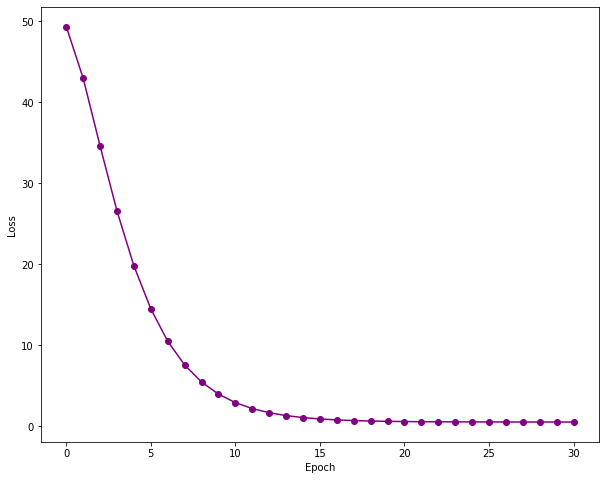

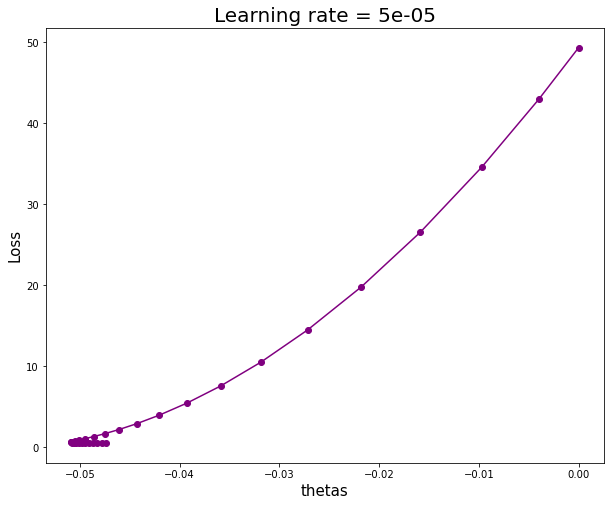

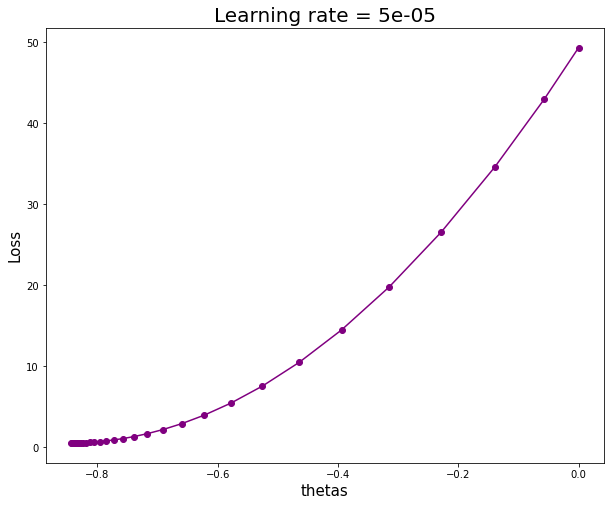

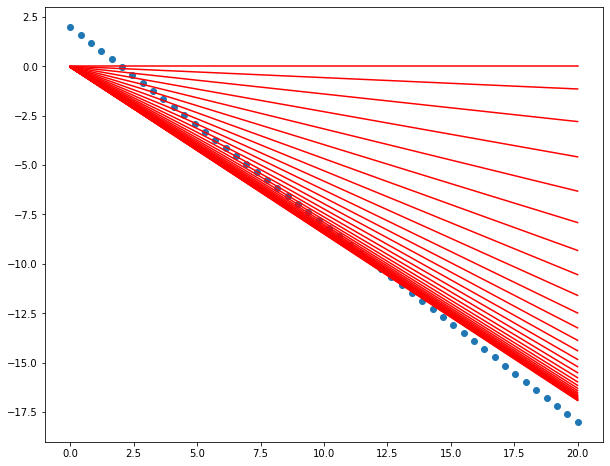

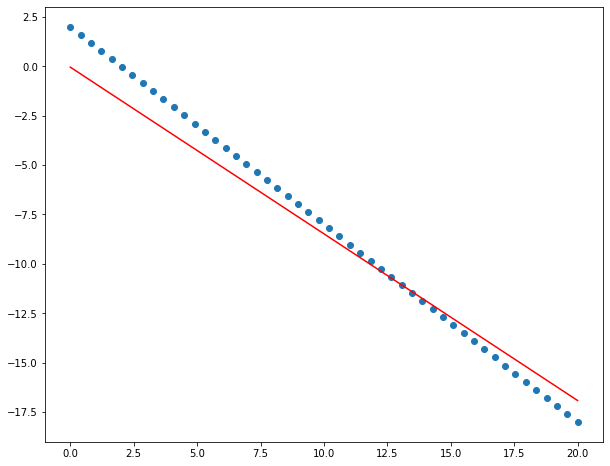

In [22]:
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

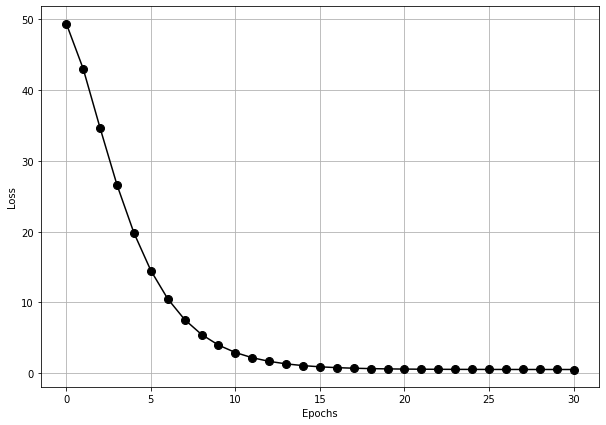

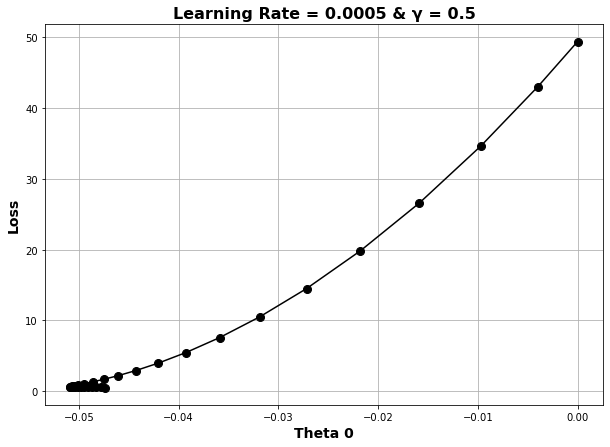

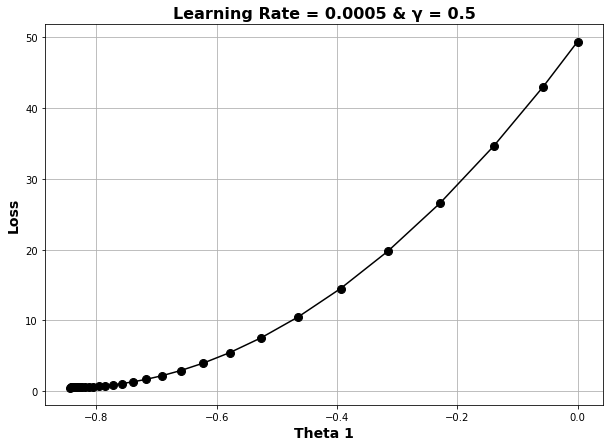

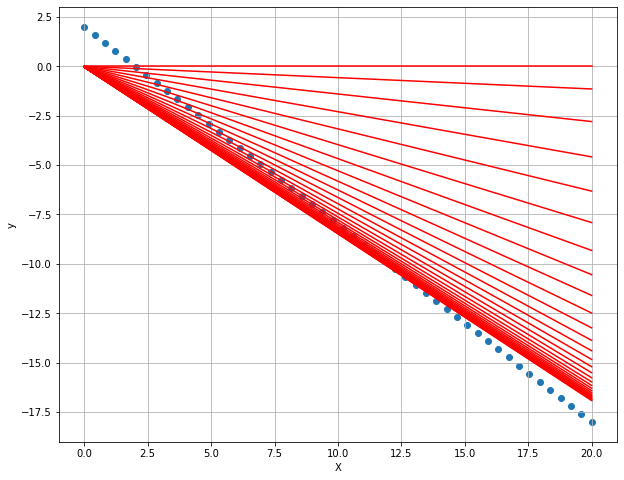

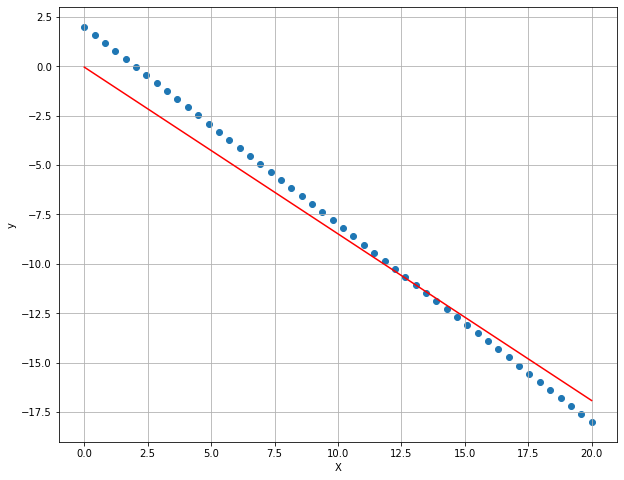

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [23]:
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0.9, 300)

Loss Didn't improve, stop condition satisfied in epoch  79


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [24]:
print('r2_score:', r2_score(y,h[-1].T))

r2_score: 0.973589591111118


r2_score 0.973589591111118


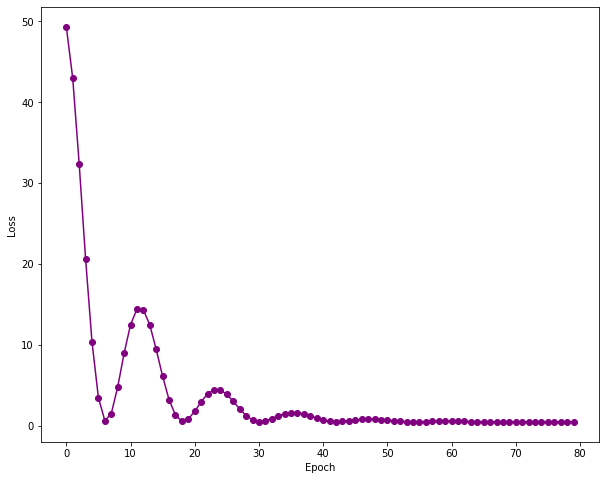

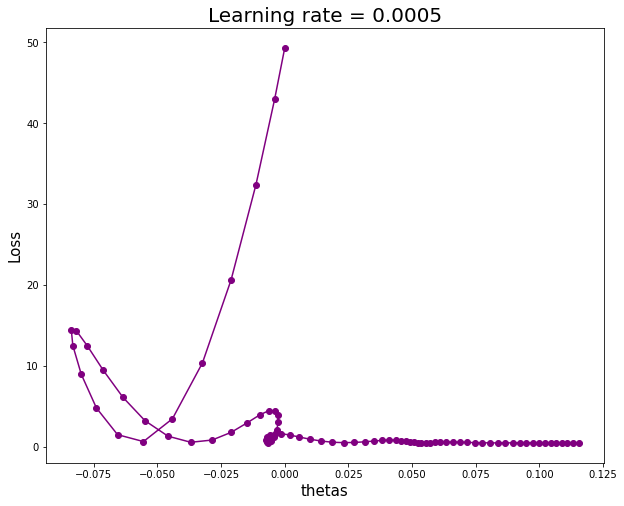

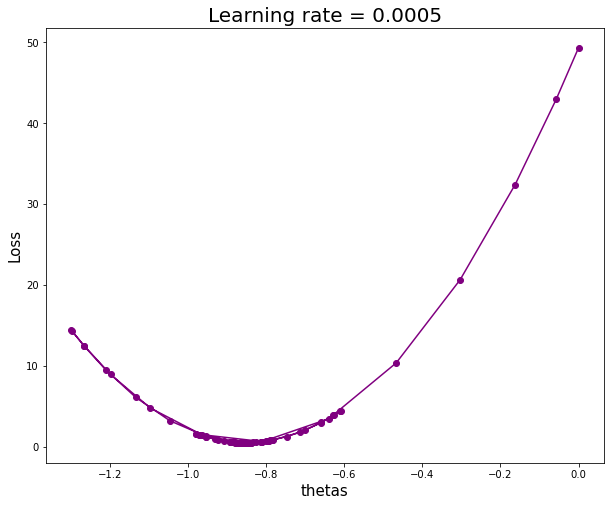

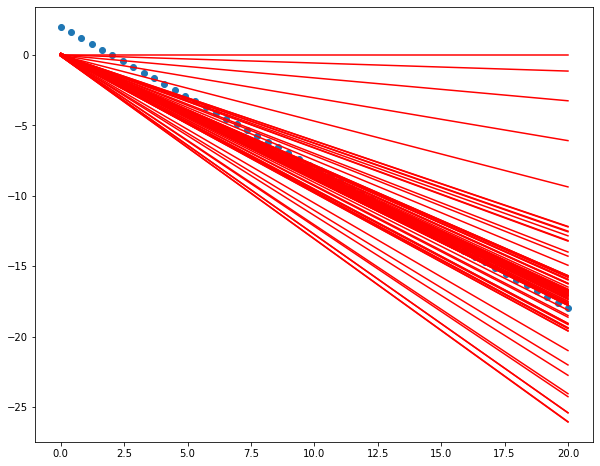

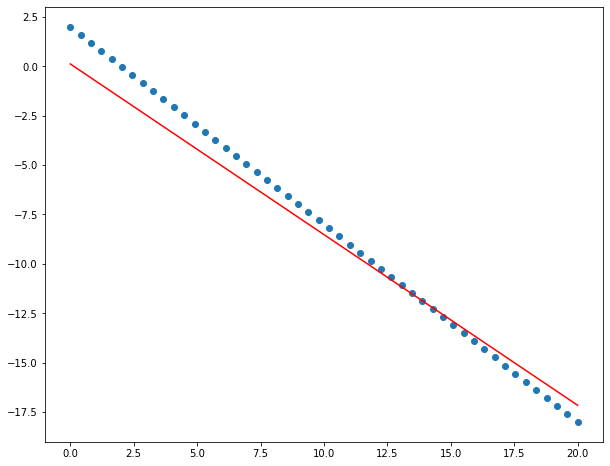

In [25]:
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

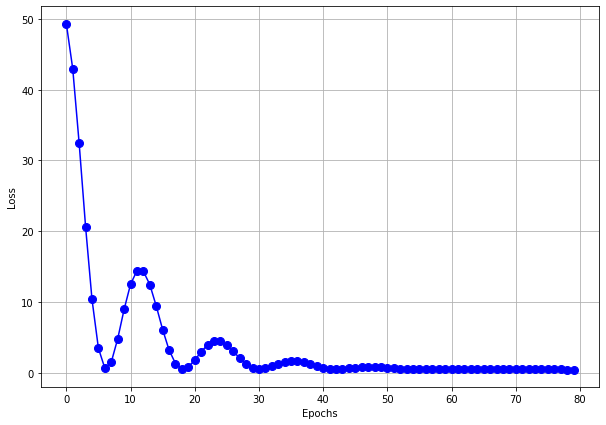

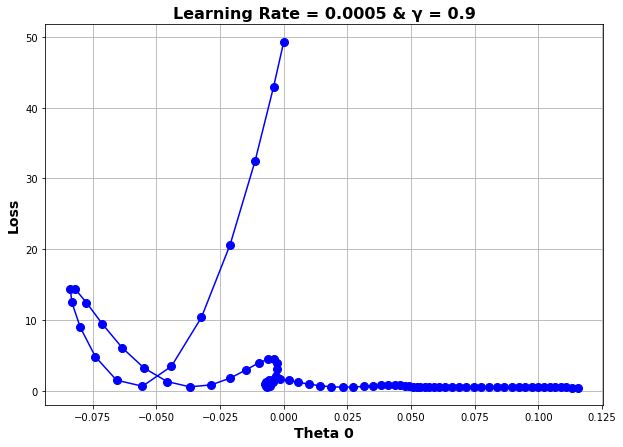

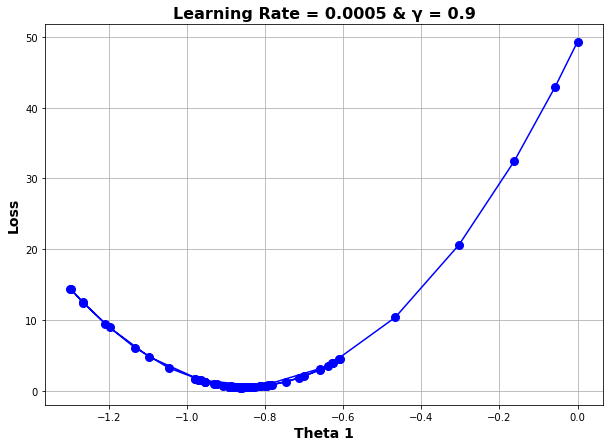

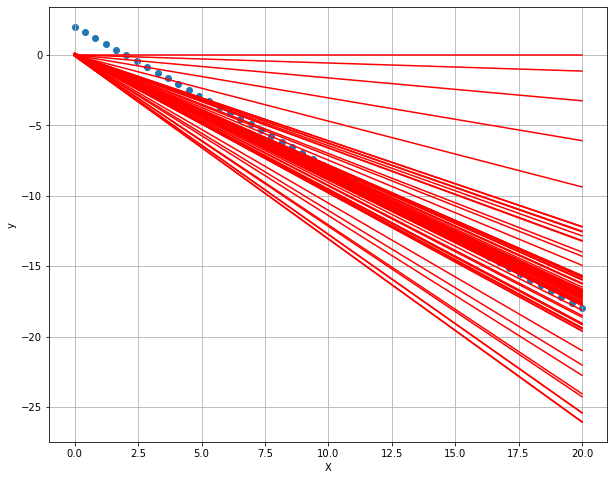

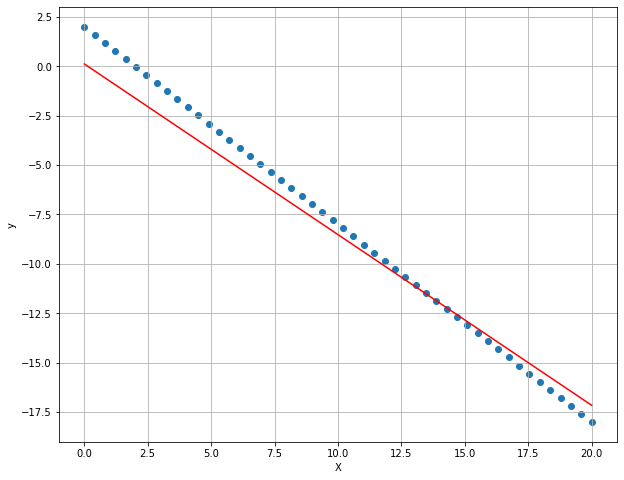

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [26]:
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0.89, 300)

Loss Didn't improve, stop condition satisfied in epoch  67


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

r2_score: 0.972435565060376


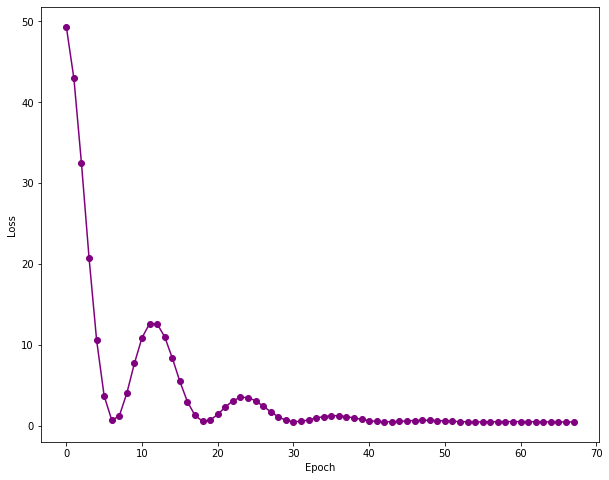

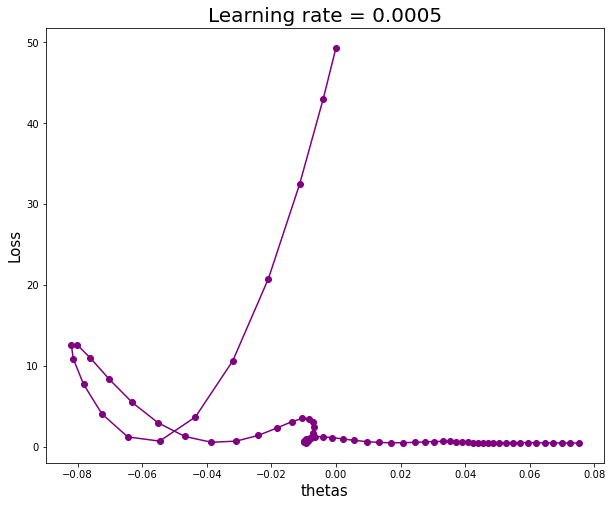

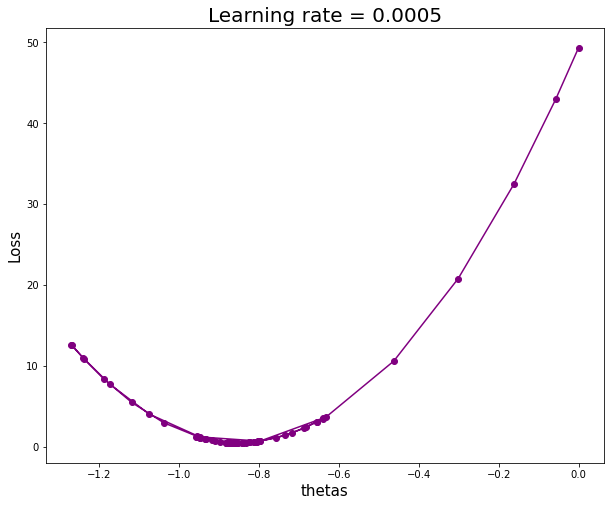

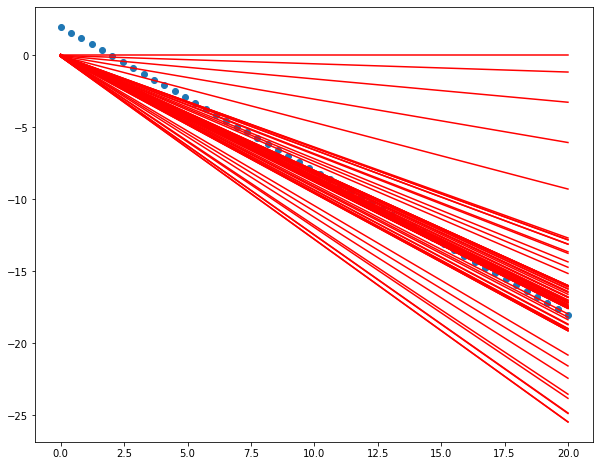

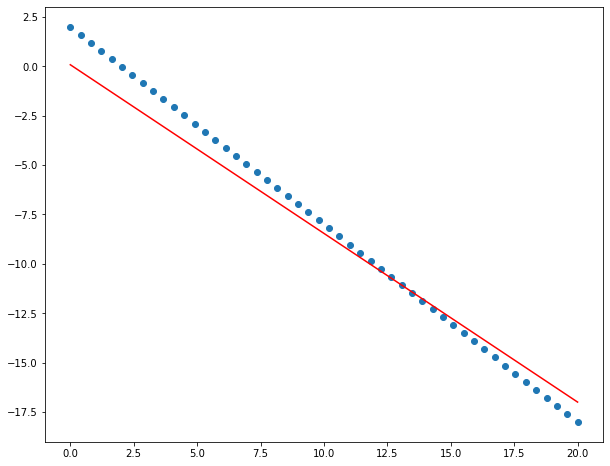

In [27]:
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

r2 score =  0.972435565060376


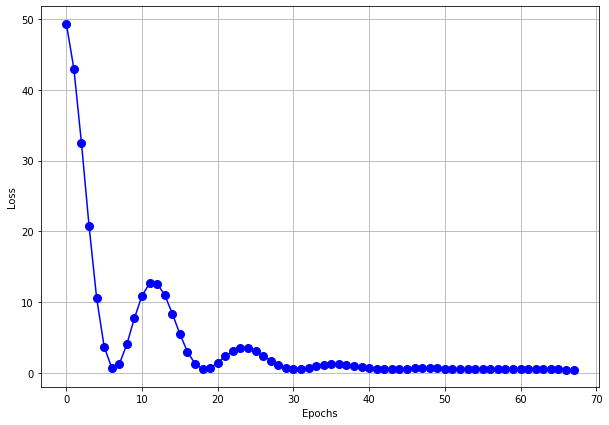

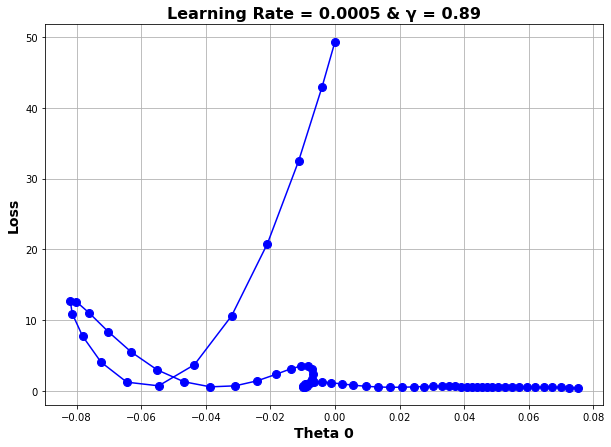

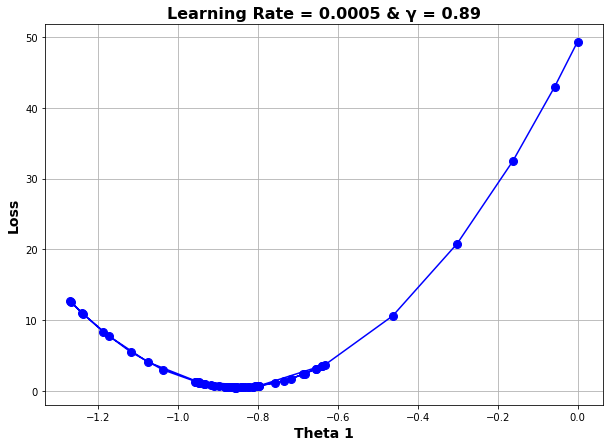

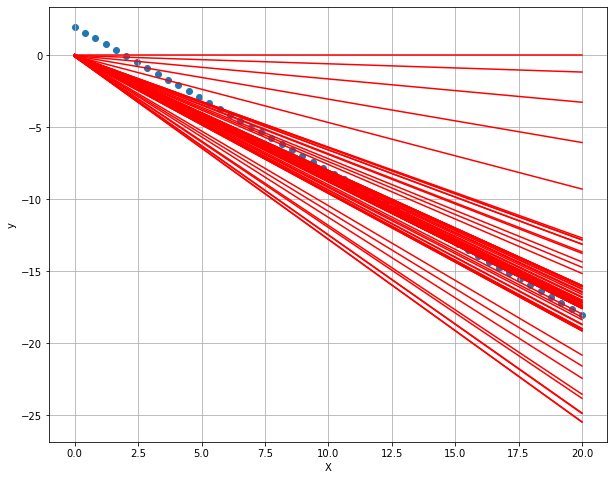

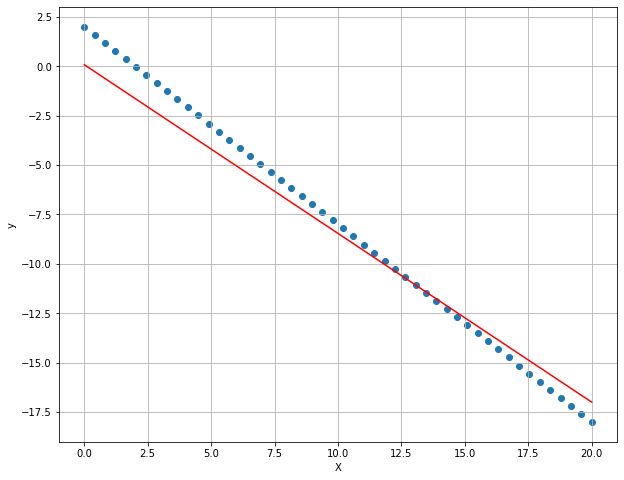

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

didn't reach convergence tolerance until last iteration
r2_score: 0.8639612307607396


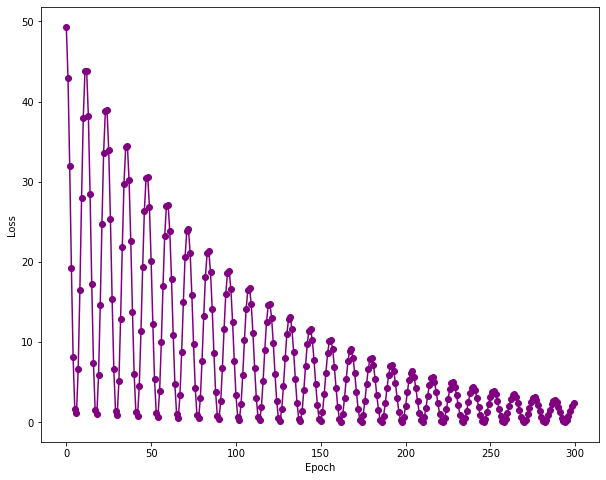

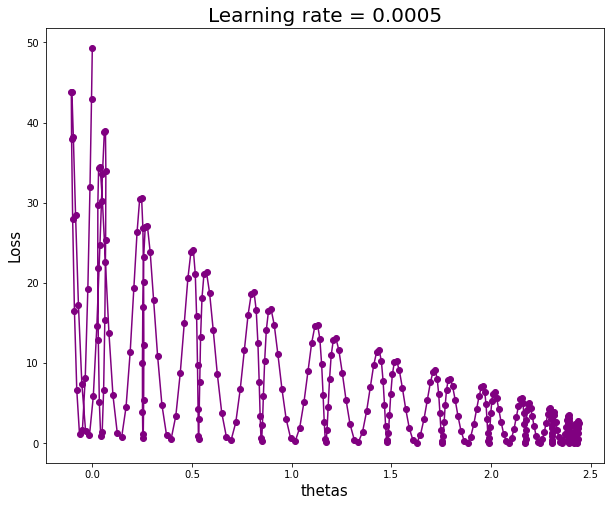

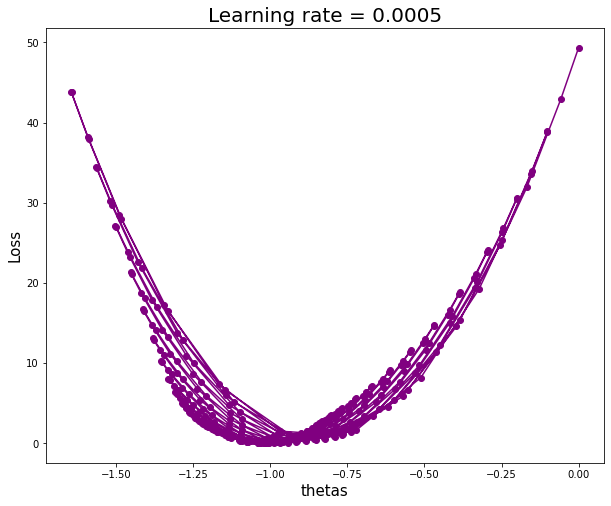

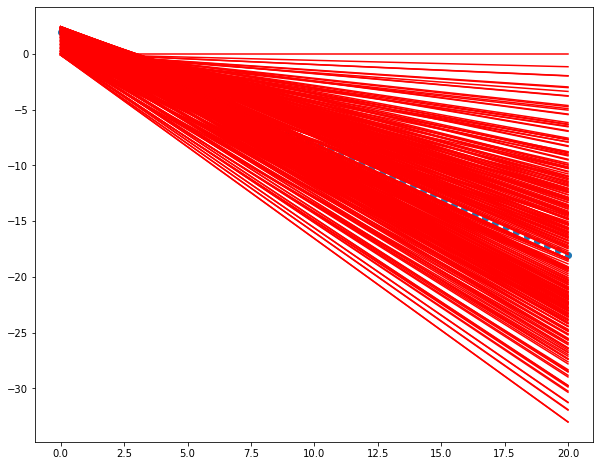

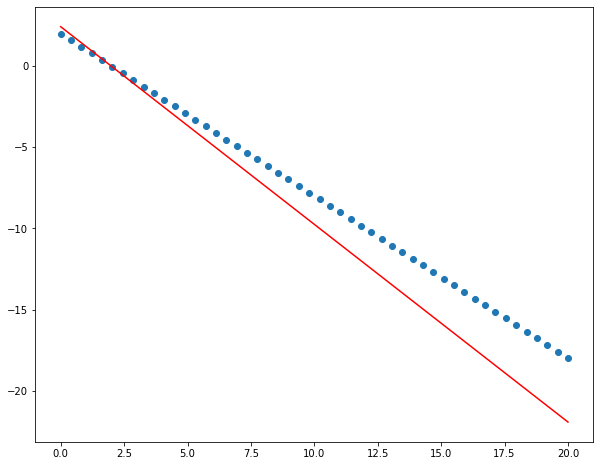

In [28]:
# Close to 1, very high oscillations (overshooting)
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0.99, 300)
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

Loss Didn't improve, stop condition satisfied in epoch  52
r2_score: 0.968684836673573


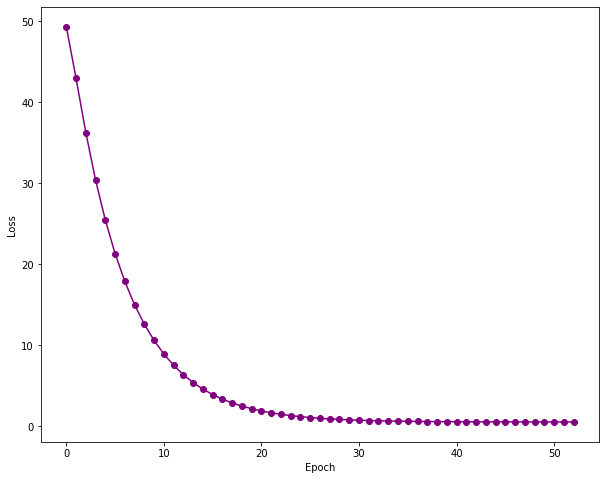

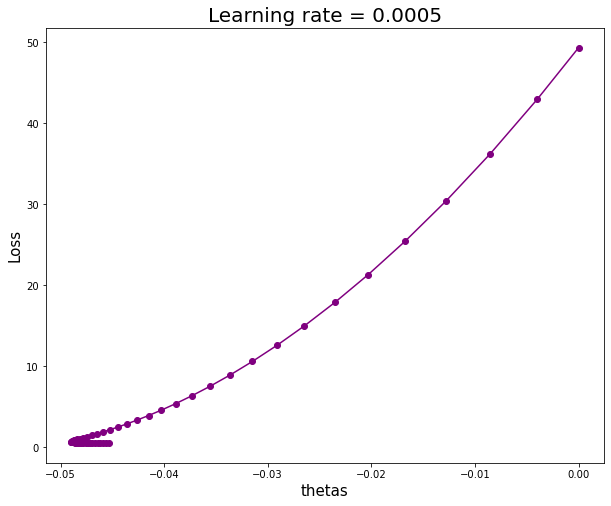

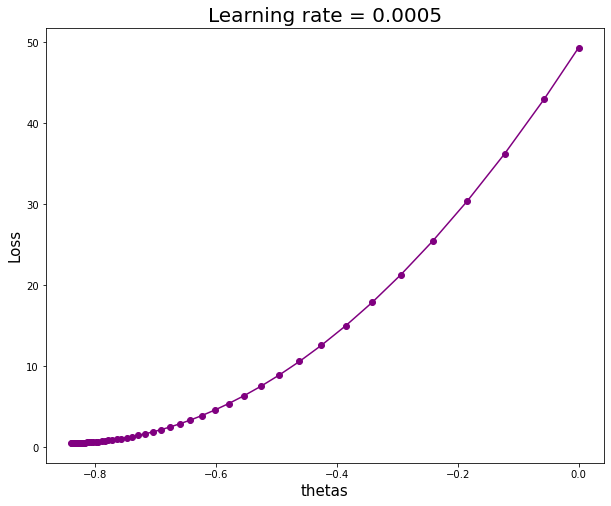

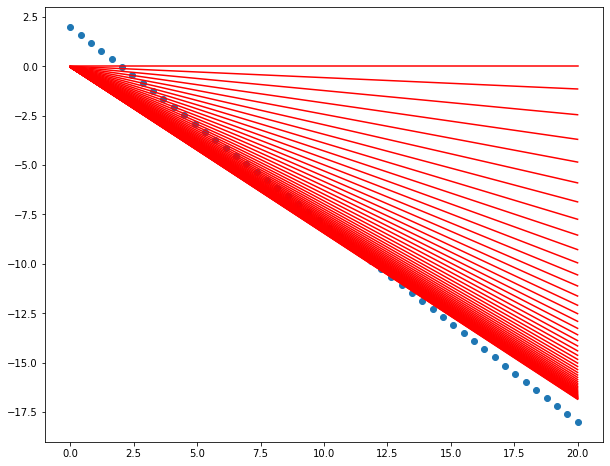

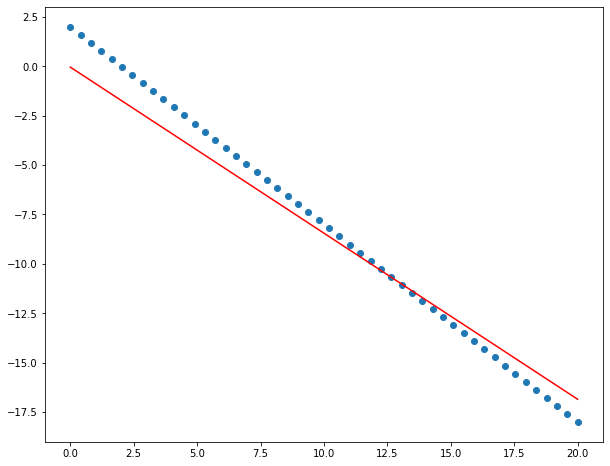

In [30]:
# Close to 0, very close to batch gd
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0.2, 300)
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

Loss Didn't improve, stop condition satisfied in epoch  65
r2_score: 0.9686158031920962


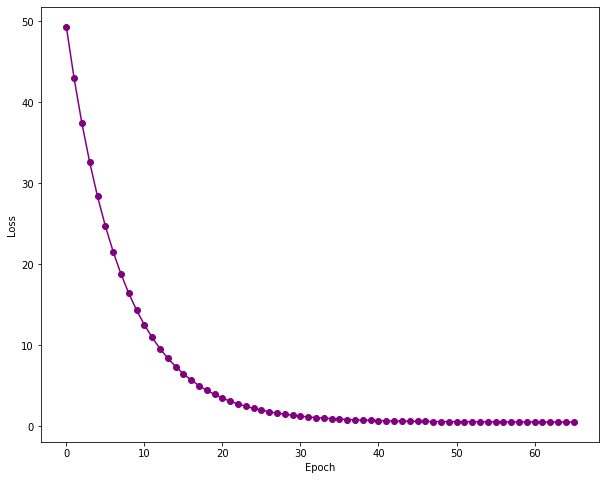

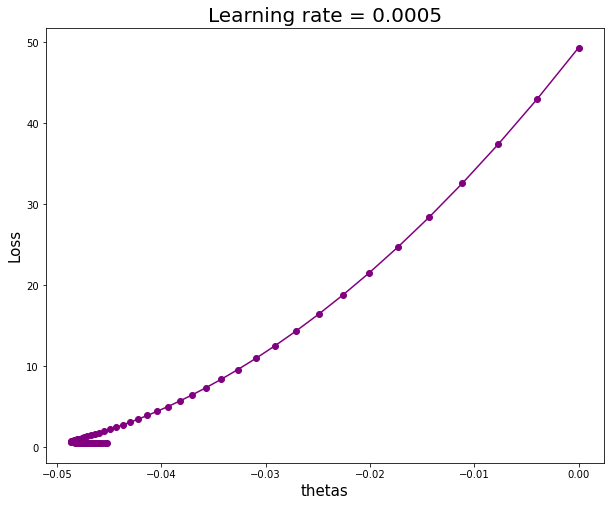

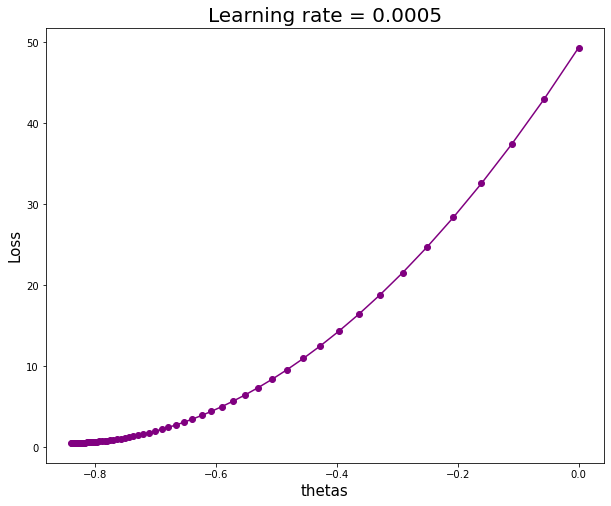

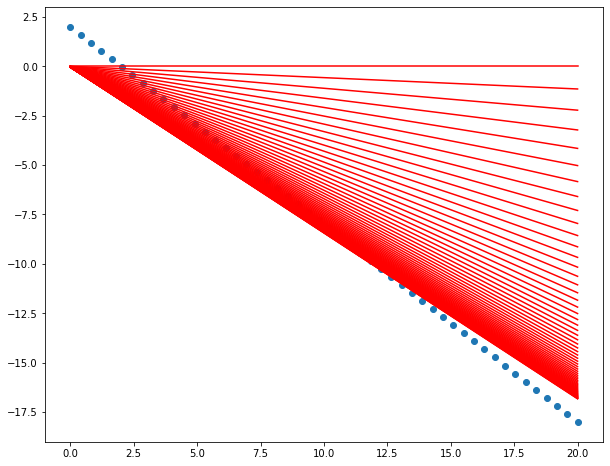

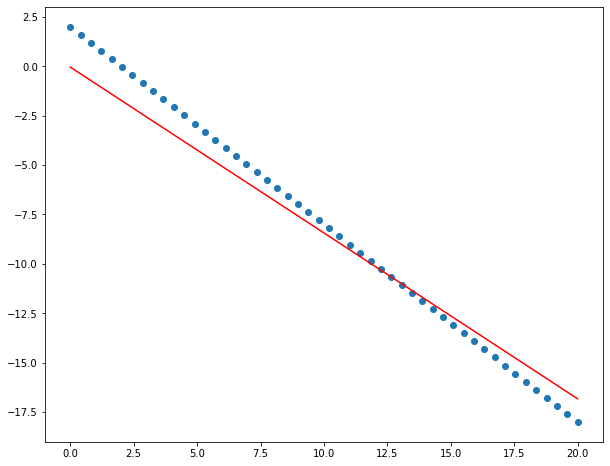

In [31]:
# momentum Of 0, the same as batch GD 
th_0, th_1, loss, h = momentum_gd(X, y, 0.0005, 0, 300)
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [34]:
def NAG_gd(x, y, lr, momentum,max_iter):
    
    # Definitions
    theta_0, theta_1, v_0, v_1= 0,0,0,0
    grad_tol = 0.001
    loss = np.array([])
    thetas_0 = np.array([])
    thetas_1 = np.array([])
    vs_0 = np.array([])
    vs_1 = np.array([])
    h_s = []
    
    #Epochs loop
    for i in range(max_iter):
        
        h_x = theta_0 + theta_1 * x
        
        #Step 3
        e = h_x-y
        j = (1/(2*len(e))*e@e)
        
        #Step 4
        d_theta_0 = (1/len(e)) * e@np.ones(e.shape)
        d_theta_1 = (1/len(e)) * np.sum(e@x)
        
        #Appends (Before update)
        loss = np.append(loss, j)
        thetas_0 = np.append(thetas_0, theta_0)
        thetas_1 = np.append(thetas_1, theta_1)
        vs_0 = np.append(vs_0, v_0)
        vs_1 = np.append(vs_1, v_1)
        h_s.append (h_x)
        
        
        # Update Equations
        theta_0_tmp, theta_1_tmp = theta_0 - momentum * v_0, theta_1 - momentum * v_1
        h_tmp = theta_0_tmp + theta_1_tmp * x
        e_tmp = h_tmp-y
        
        #Step 4   
        d_theta_0_tmp= (1/len(e_tmp)) * e_tmp@np.ones(e_tmp.shape)
        d_theta_1_tmp= (1/len(e_tmp)) * np.sum(e_tmp@x)
        
        grad = np.array([d_theta_0_tmp, d_theta_1_tmp])
            
        v_0, v_1 = momentum * v_0 + lr*d_theta_0_tmp, momentum * v_1 + lr*d_theta_1_tmp
        theta_0, theta_1 = theta_0_tmp - lr*d_theta_1_tmp , theta_1_tmp - lr*d_theta_1_tmp

        # Check stop condition
        if (i != 0) and (abs(loss[i-1]-loss[i]) < 0.001):
            print("Loss Didn't improve, stop condition satisfied in epoch ", i)
            return thetas_0, thetas_1, loss, h_s
            break
        
        #Check convergence condition
        if np.linalg.norm(grad) < grad_tol:
            print('Converged at iteration ', i)
            print ('****************** Training Report ********************')
            print()
            print('Gradient Descent converged after {} iterations'.format(i))
            print()
            print('theta_0_Opt:', theta_0)
            print('theta_1_Opt:', theta_1)
            print()
            print('Error Vector:')
            print(e)
            print()
            print('Cost (j):', j)
            print()
            print('h(x) = y_predict:')
            print(h_x)
            print()
            print('y_actual:')
            print(y)
            return thetas_0, thetas_1, loss, h_s
            break
    print("didn't reach convergence tolerance until last iteration")
    return thetas_0, thetas_1, loss, h_s

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

Loss Didn't improve, stop condition satisfied in epoch  44
r2_score: 0.9686515185321422


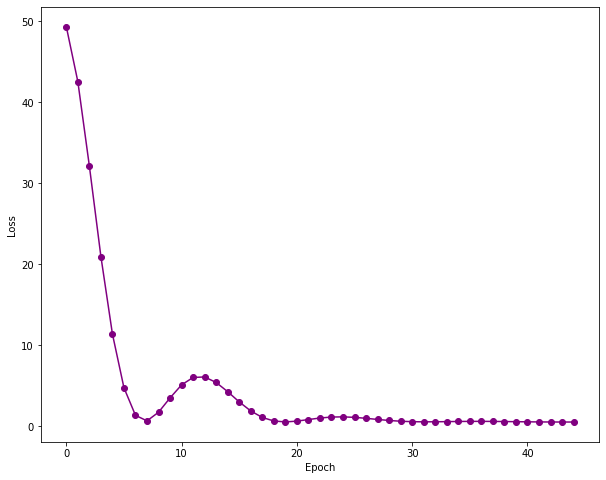

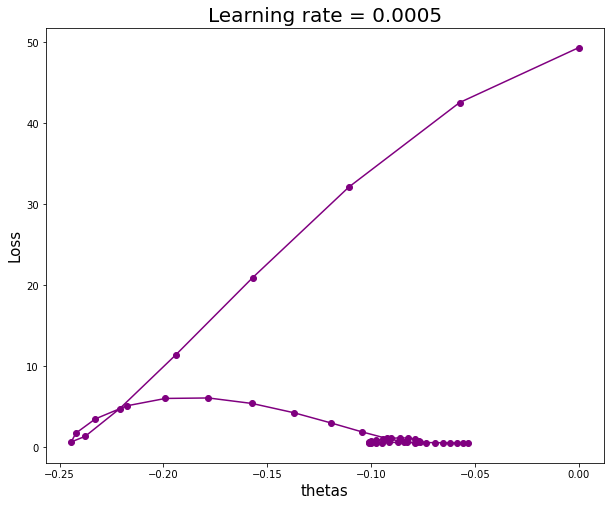

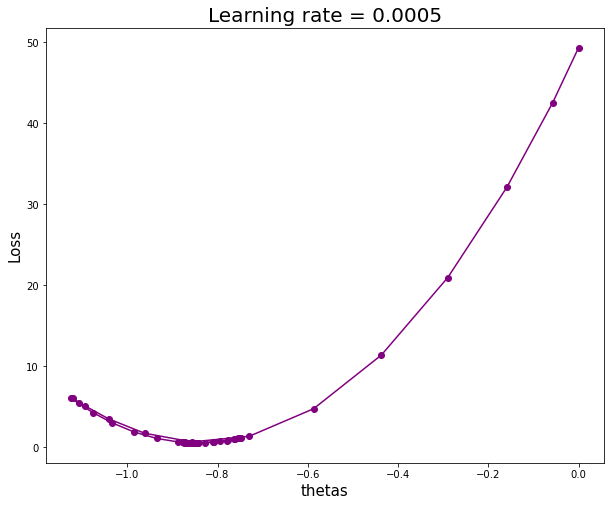

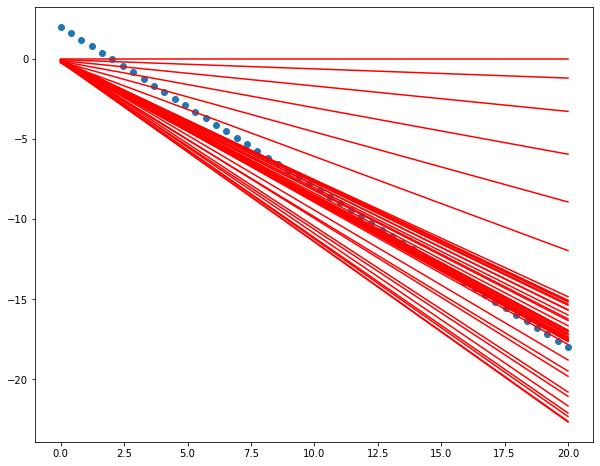

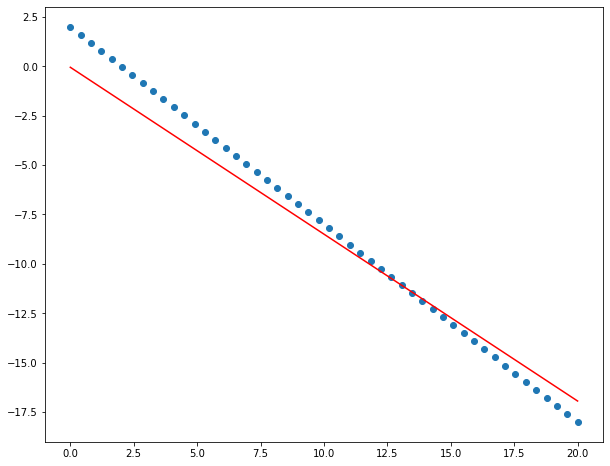

In [36]:
th_0, th_1, loss, h = NAG_gd(X, y, 0.0005, 0.9, 300)
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

r2_score 0.971103130756324


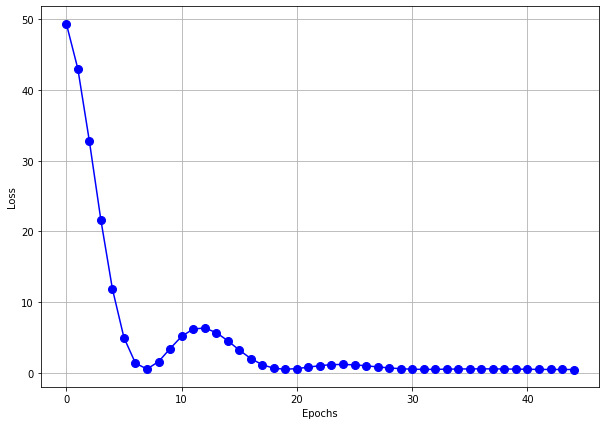

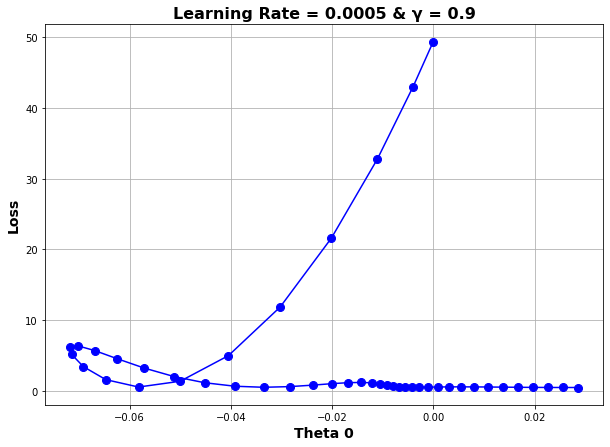

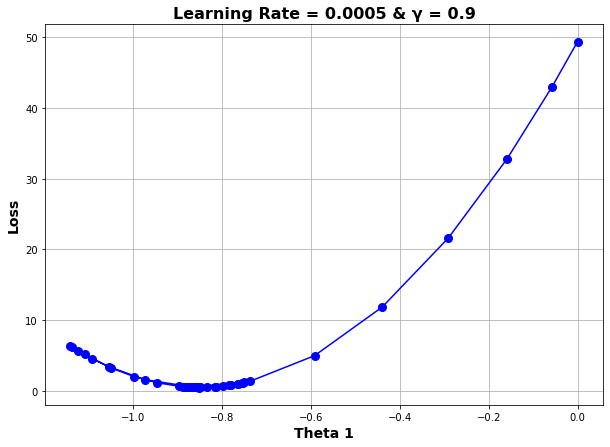

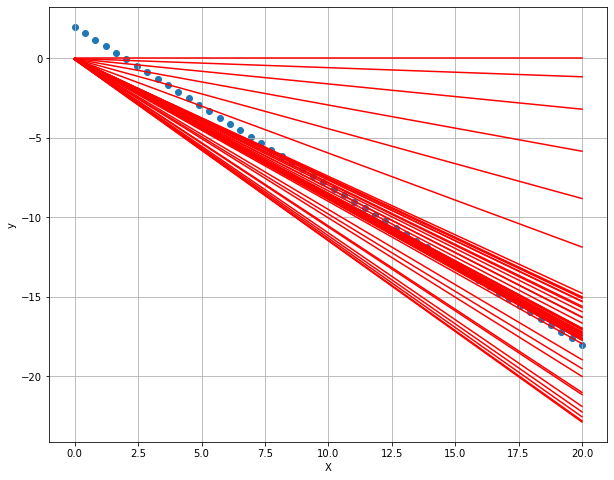

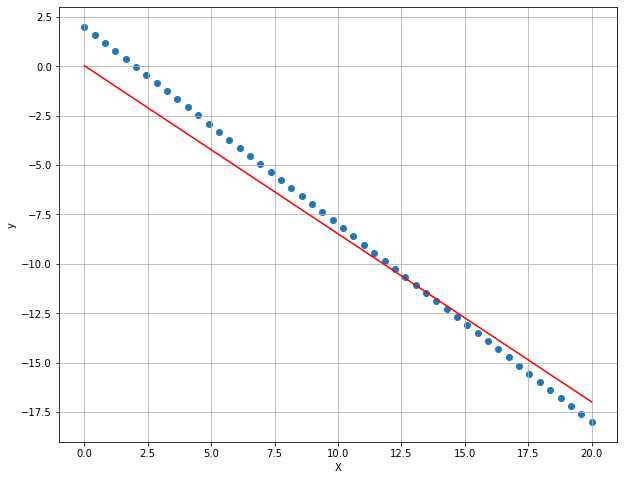

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

Loss Didn't improve, stop condition satisfied in epoch  45
r2_score: 0.9682214736546999


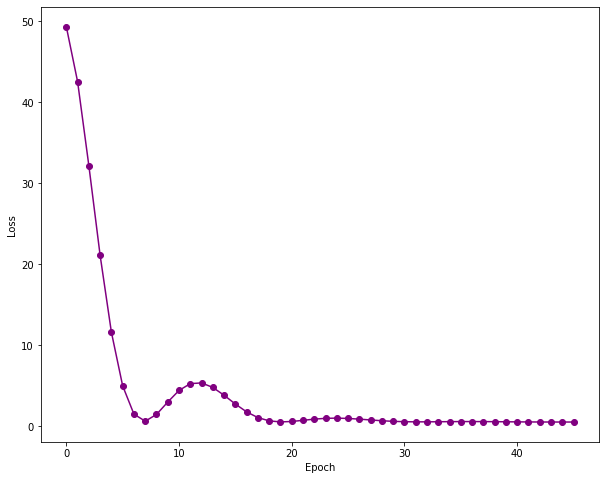

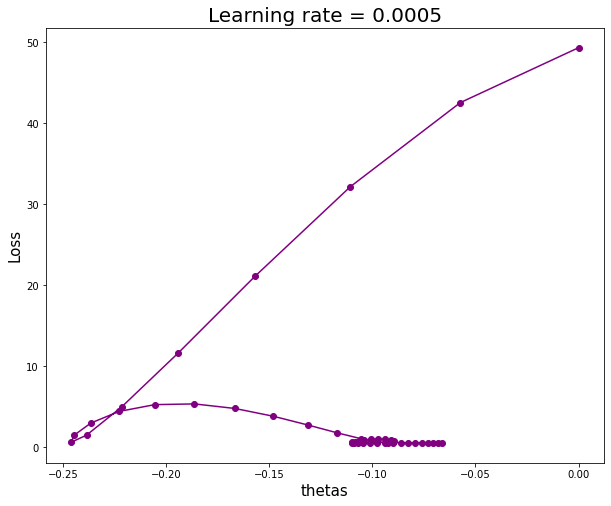

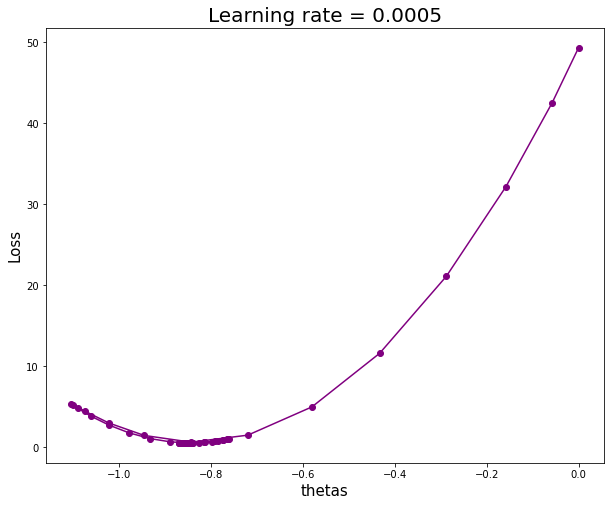

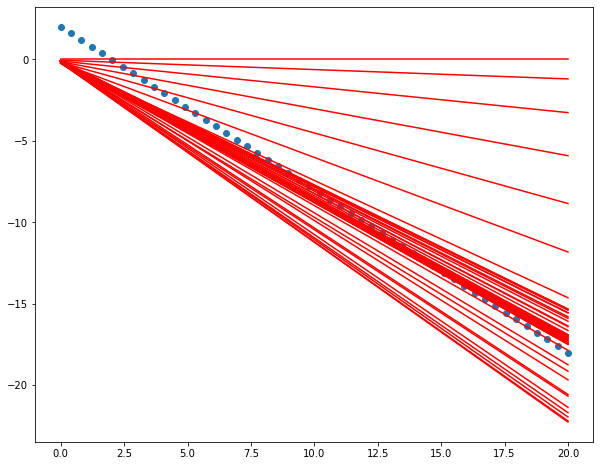

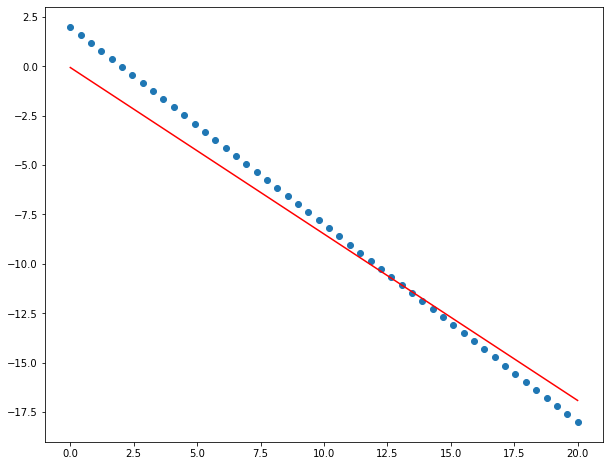

In [38]:
# momentum Of 0, the same as batch GD 
th_0, th_1, loss, h = NAG_gd(X, y, 0.0005, 0.89, 300)
print('r2_score:', r2_score(y,h[-1].T))
loss_eps(loss, len(loss))
theta_loss(th_0, loss, 0.0005, len(th_0))
theta_loss(th_1, loss, 0.0005, len(th_0))
all_reg_lines(X,y,h)
all_reg_lines(X,y,[h[-1]])

r2 score =  0.9699718983158406


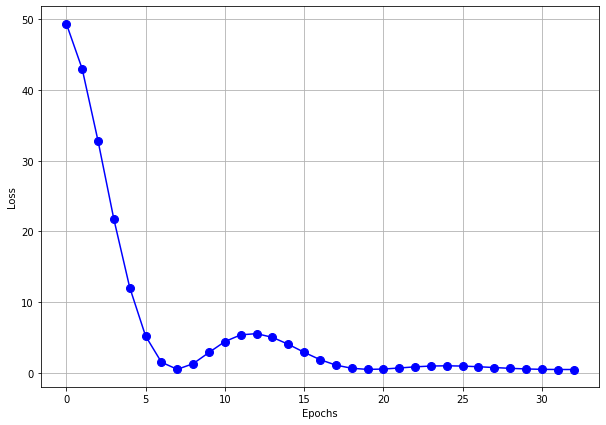

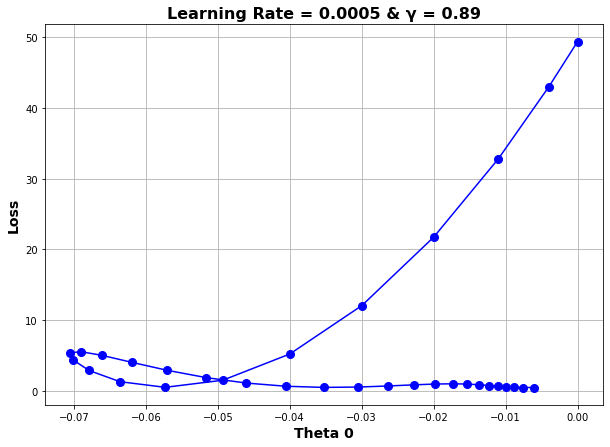

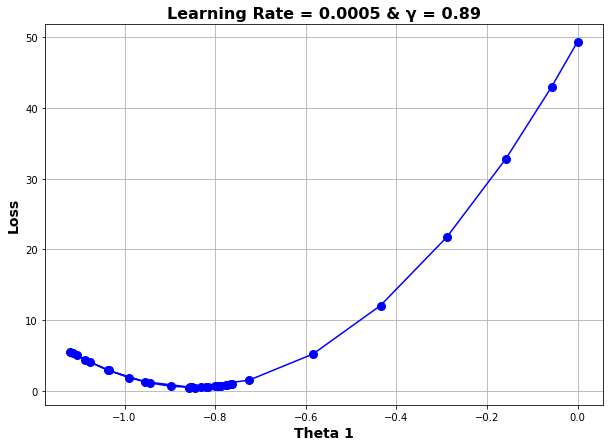

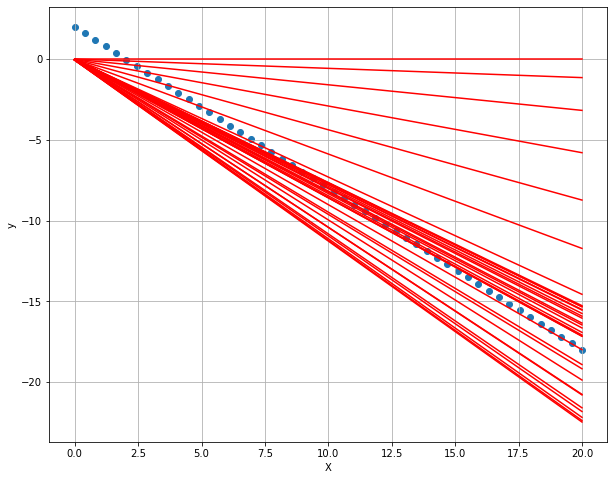

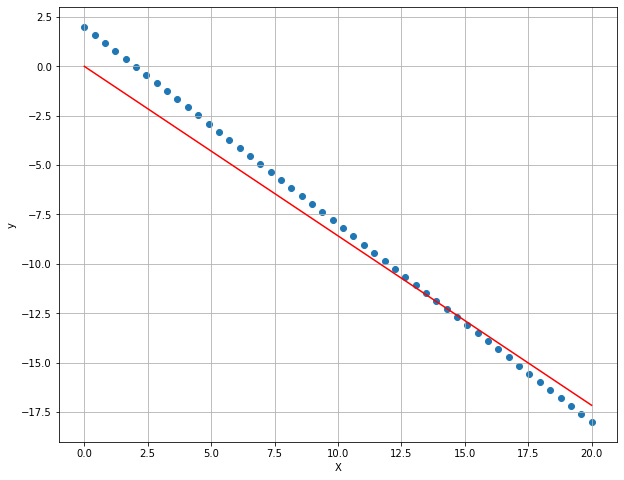